# HW4 Q3: NYS Mesonet Observations during the 2024 Solar Eclipse

## Imports

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter, AutoDateLocator,HourLocator,DayLocator,MonthLocator,MinuteLocator

<div class="alert alert-warning"><b>TASK:</b> Add a code cell that sets the default Seaborn settings for Matplotlib</div>

In [2]:
# Write your code here
sns.set()

Create a <code>Dataframe</code> from the April 8 2024 NYSM data file. Interpret the <code>time</code> column in `datetime` format.

In [3]:
df = pd.read_csv('/spare11/atm350/common/hw4/20240408_nysm.csv', parse_dates=['time'])

<div class="alert alert-warning"><b>TASK:</b> Examine the <code>dataframe</code></div>

In [4]:
# Write your code here
df

station                      time  temp_2m [degC]  temp_9m [degC]  \
0        ADDI 2024-04-07 23:00:00+00:00            10.0            10.2   
1        ADDI 2024-04-07 23:05:00+00:00             9.7            10.0   
2        ADDI 2024-04-07 23:10:00+00:00             9.3             9.7   
3        ADDI 2024-04-07 23:15:00+00:00             9.0             9.5   
4        ADDI 2024-04-07 23:20:00+00:00             8.8             9.3   
...       ...                       ...             ...             ...   
37975    YORK 2024-04-08 23:35:00+00:00            14.6            14.8   
37976    YORK 2024-04-08 23:40:00+00:00            14.3            14.7   
37977    YORK 2024-04-08 23:45:00+00:00            13.1            14.4   
37978    YORK 2024-04-08 23:50:00+00:00            11.6            14.1   
37979    YORK 2024-04-08 23:55:00+00:00            11.1            14.0   

       relative_humidity [percent]  precip_incremental [mm]  \
0                             27.8                      0.0   
1                             28.5                      0.0   
2                             30.0                      0.0   
3                             29.8                      0.0   
4                             29.7                      0.0   
...                            ...                      ...   
37975                         40.7                      0.0   
37976                         41.4                      0.0   
37977                         45.6                      0.0   
37978                         52.1                      0.0   
37979                         52.7                      0.0   

       precip_local [mm]  precip_max_intensity [mm/min]  \
0                    0.0                            0.0   
1                    0.0                            0.0   
2                    0.0                            0.0   
3                    0.0                            0.0   
4                    0.0                            0.0   
...                  ...                            ...   
37975                0.0                            0.0   
37976                0.0                            0.0   
37977                0.0                            0.0   
37978                0.0                            0.0   
37979                0.0                            0.0   

       avg_wind_speed_prop [m/s]  max_wind_speed_prop [m/s]  ...  \
0                            3.7                        5.9  ...   
1                            2.8                        4.8  ...   
2                            1.8                        3.3  ...   
3                            2.4                        4.7  ...   
4                            2.8                        4.9  ...   
...                          ...                        ...  ...   
37975                        1.6                        2.4  ...   
37976                        1.3                        1.7  ...   
37977                        1.3                        1.6  ...   
37978                        1.1                        1.5  ...   
37979                        1.2                        1.4  ...   

       soil_temp_05cm [degC]  soil_temp_25cm [degC]  soil_temp_50cm [degC]  \
0                        7.3                    5.4                    5.2   
1                        7.3                    5.4                    5.2   
2                        7.3                    5.4                    5.2   
3                        7.3                    5.4                    5.2   
4                        7.3                    5.4                    5.2   
...                      ...                    ...                    ...   
37975                    7.7                    7.1                    7.0   
37976                    7.7                    7.1                    7.0   
37977                    7.7                    7.1                    7.0   
37978                    7.7              

<div class="alert alert-warning"><b>TASK: </b>Select start and end time that covers a 3-hour period that includes the peak of the 4/8/24 eclipse over NYS. Use Pandas' <code>Timestamp</code> function. An example invocation to set the start time to 2000 UTC March 8 1970 would be:<br>
<code>timeStart = pd.Timestamp(1970, 3, 8, 14, tz='UTC')</code></div>

In [5]:
# Write your code here
timeStart = pd.Timestamp(2024, 4, 8, 18, tz = 'UTC')
timeEnd = pd.Timestamp(2024, 4, 8, 21, tz = 'UTC')

Set a boolean mask that includes the period of interest, then create a new `Dataframe` from that mask.

In [6]:
mask = (df['time'] >= timeStart) & (df['time'] <=timeEnd) 
dfSub = df[mask]

TASK: Examine the subsetted `Dataframe`

In [7]:
dfSub

station                      time  temp_2m [degC]  temp_9m [degC]  \
228      ADDI 2024-04-08 18:00:00+00:00            12.0            12.0   
229      ADDI 2024-04-08 18:05:00+00:00            11.8            11.9   
230      ADDI 2024-04-08 18:10:00+00:00            11.6            11.7   
231      ADDI 2024-04-08 18:15:00+00:00            11.7            11.8   
232      ADDI 2024-04-08 18:20:00+00:00            11.8            11.9   
...       ...                       ...             ...             ...   
37940    YORK 2024-04-08 20:40:00+00:00            14.3            13.9   
37941    YORK 2024-04-08 20:45:00+00:00            14.8            14.3   
37942    YORK 2024-04-08 20:50:00+00:00            15.1            14.5   
37943    YORK 2024-04-08 20:55:00+00:00            15.5            14.7   
37944    YORK 2024-04-08 21:00:00+00:00            15.7            14.7   

       relative_humidity [percent]  precip_incremental [mm]  \
228                           39.4                      0.0   
229                           40.1                      0.0   
230                           42.6                      0.0   
231                           40.9                      0.0   
232                           39.3                      0.0   
...                            ...                      ...   
37940                         45.5                      0.0   
37941                         41.6                      0.0   
37942                         39.9                      0.0   
37943                         39.7                      0.0   
37944                         37.7                      0.0   

       precip_local [mm]  precip_max_intensity [mm/min]  \
228                  0.0                            0.0   
229                  0.0                            0.0   
230                  0.0                            0.0   
231                  0.0                            0.0   
232                  0.0                            0.0   
...                  ...                            ...   
37940                0.0                            0.0   
37941                0.0                            0.0   
37942                0.0                            0.0   
37943                0.0                            0.0   
37944                0.0                            0.0   

       avg_wind_speed_prop [m/s]  max_wind_speed_prop [m/s]  ...  \
228                          3.3                        5.3  ...   
229                          3.5                        5.3  ...   
230                          4.0                        5.5  ...   
231                          3.8                        5.7  ...   
232                          4.2                        6.8  ...   
...                          ...                        ...  ...   
37940                        0.4                        0.7  ...   
37941                        0.2                        0.6  ...   
37942                        0.8                        1.1  ...   
37943                        1.2                        1.7  ...   
37944                        1.4                        2.0  ...   

       soil_temp_05cm [degC]  soil_temp_25cm [degC]  soil_temp_50cm [degC]  \
228                      5.6                    5.4                    5.4   
229                      5.6                    5.4                    5.4   
230                      5.7                    5.4                    5.4   
231                      5.7                    5.4                    5.4   
232                      5.7                    5.4                    5.4   
...                      ...                    ...                    ...   
37940                    7.4                    7.0                    7.0   
37941                    7.4                    7.0                    7.0   
37942                    7.4                    6.9                    7.0   
37943                    7.4              

Task: define five NYSM stations from across the state. Ideally, choose sites that vary in terms of time of totality and/or degree of totality.

In [8]:
# Write your code here
site1 = "BRAN"
site2 = "RUSH"
site3 = "REDF"
site4 = "TUPP"
site5 = "CHAZ"

TASK: Complete the following code cell in order to produce a well-labeled figure containing two subplots, one on top of the other, containing time series of 2m temperature and incoming solar radiation for the five NYSM sites you have defined above.

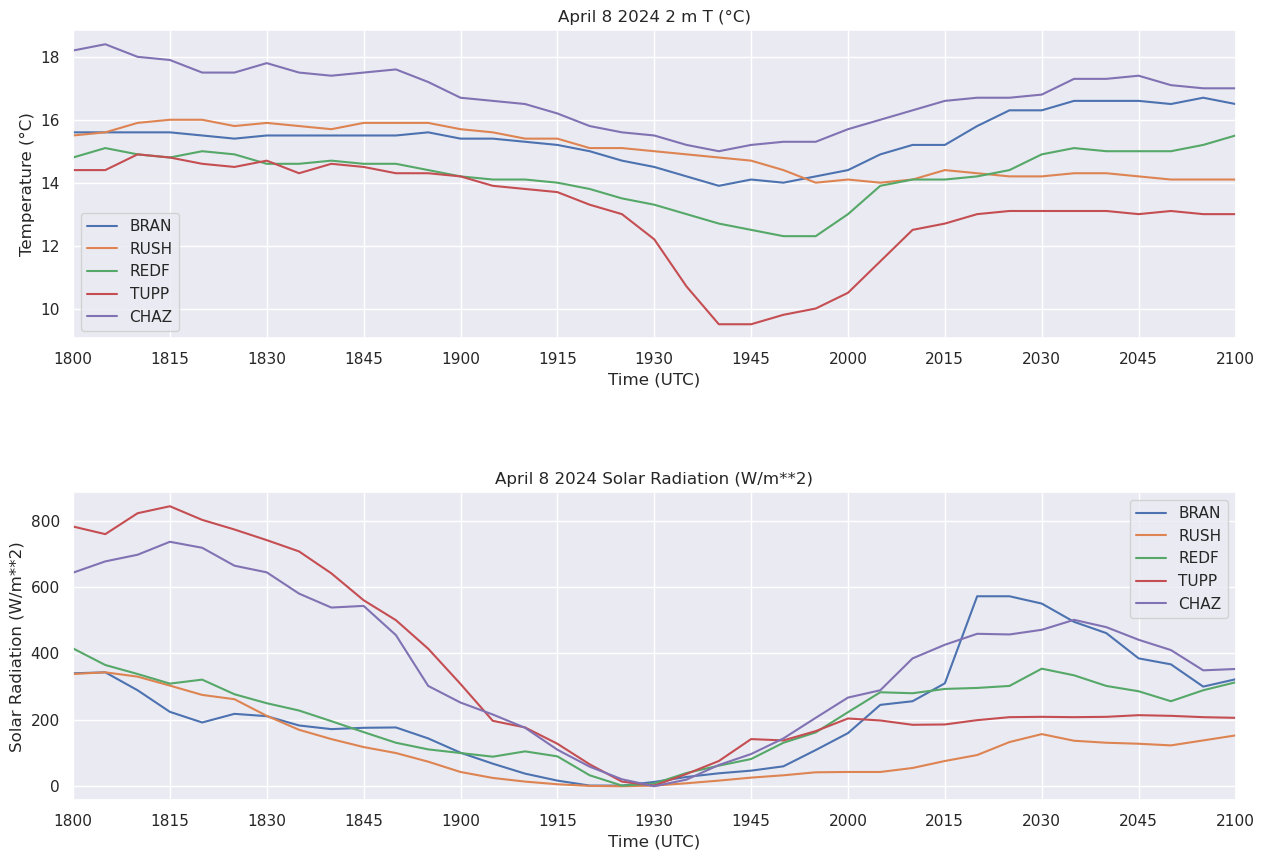

In [9]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2, sharex=ax1)

for site in [site1, site2, site3, site4, site5]:
    
    siteData = dfSub.query('station == @site')
    dattim = siteData['time']
    t2m = siteData['temp_2m [degC]']
    srad = siteData['solar_insolation [W/m^2]']
 
    ax1.plot (dattim, t2m, label=site)
    ax2.plot (dattim, srad, label=site)

ax1.set_title ("April 8 2024 2 m T (°C)")
ax1.set_xlabel('Time (UTC)')
ax1.set_ylabel('Temperature (°C)')
ax1.xaxis.set_major_locator(MinuteLocator(interval=15))
dateFmt = DateFormatter('%H%M')
ax1.xaxis.set_major_formatter(dateFmt)
ax1.set_xlim(timeStart, timeEnd)
ax1.legend(loc='best')

ax2.set_title ("April 8 2024 Solar Radiation (W/m**2)")
ax2.set_xlabel('Time (UTC)')
ax2.set_ylabel('Solar Radiation (W/m**2)')
ax2.legend(loc='best')

# Add some space between the two subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)